Реализуем поиск Гровера для 2х кубитов, ищем состояние $|q \rangle $.

В данном алгоритме оракул представим в виде:


$U_{q}|x\rangle=|x\rangle  \text { for } x \neq q$


$U_{q}|x\rangle=-|x\rangle \text {for } x=q $

1. Сконструируем суперпозицию состояний в виде -- $|s\rangle=H^{\otimes n}|0\rangle^{n}$

Введем ортогональную систему координат из векторов  $|q\rangle$ и $\left|e\right\rangle$, тогда можно представить суперпозиционное состояние в виде $|s\rangle=\sin \theta|q\rangle+\cos \theta\left|e \right\rangle,$ где, очевидно, $\theta=\arcsin \langle s \mid q\rangle=\arcsin \frac{1}{\sqrt{N}} $.

Для 2х кубитов $\theta=\arcsin \frac{1}{\sqrt{N=4}} = \frac{\pi}{6}$


2. Применение оракула $U_{q}$ к суперпозиционному состоянию.

В введенной системе координат применеие оракула означает, что координата разложения, соответствующая вектору $|q\rangle$, меняет знак.

3. Применяем вращение $U_{s}=2|s\rangle\langle s|-1$. Очевидно, что вращение относительно вектора $|s\rangle$ можно представить в таком виде, так как, действуя этим оператором на состояние, ортоногональное $|s\rangle$, мы получим смену знака, при этом действие на состояние $|s\rangle$ его не меняет. 

В результате этого действия амплитуда искомого состояния вырастет по сравнению с остальными. 

Эти действия мы применяем несколько $m$ раз $\left(U_{s} U_{q}\right)^{m}|s\rangle=\sin \theta_{m}|q\rangle+\cos \theta_{m}\left|e\right\rangle$

$$
\theta_{m}=(2 m+1) \theta
$$

Итак, для нахождения $|q \rangle$ (получения этого вектора в результате измерения) нужен угол $\theta_{m}=\frac{\pi}{2},$ в случае 2х кубитов $\theta=\frac{\pi}{6}$ нужно положить $m=1 .$ 


Рассмотрим в качестве примера $|q \rangle = |1 1 \rangle $.

Оракул представим в виде 

$$
U_{q}=\left[\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -1
\end{array}\right],
$$

что соответствует контролируемому применеию оператора z.

Сконструируем оператор отражения.
По определению отражения, нам нужно изменить знак на противоположный у всех векторов, ортогональных $s$. Для этого перейдем в систему координат, где $s$ -- нулевой вектор, для этого применим оператор адамара. 

$$
H^{\otimes n}|s\rangle=|0\rangle
$$

Далее мы сконструируем такой оператор, которые меняет знак у всех состояний, кроме 0 (отражает), и действует на сумму базисных векторов следующим образом --
$$
 \frac{1}{2}(|00\rangle+|01\rangle+|10\rangle+|11\rangle) --> \frac{1}{2}(|00\rangle-|01\rangle-|10\rangle-|11\rangle)
$$

Матрицу такого оператора можно представить в виде перемножения котролируемого применения оператора Z и z-матриц Паули к каждому из кубитов. 

И потом мы возвращаемся в исходную систему координат, искомый оператор отражения в которой запишется как 

$$
H^{\otimes n} U_{0} H^{\otimes n}=U_{s}
$$

In [1]:
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram

In [2]:
grover_circuit = QuantumCircuit(2)

#создание суперпозиционного состояния
grover_circuit.h([0,1])
#применение Оракула 
grover_circuit.cz(0,1)
# (U_s)
grover_circuit.h([0,1])
grover_circuit.z([0,1])
grover_circuit.cz(0,1)
grover_circuit.h([0,1])
grover_circuit.draw()

┌───┐   ┌───┐┌───┐   ┌───┐
q_0: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├
     ├───┤ │ ├───┤├───┤ │ ├───┤
q_1: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├
     └───┘   └───┘└───┘   └───┘

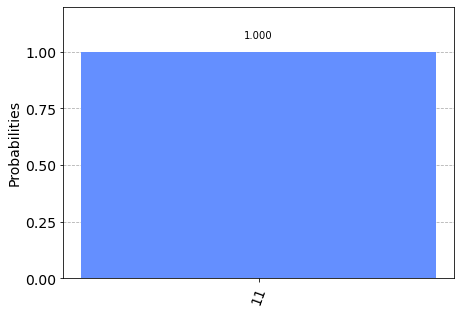

In [3]:
grover_circuit.measure_all()

qasm_simulator = Aer.get_backend('qasm_simulator')
shots = 1024
results = execute(grover_circuit, backend=qasm_simulator, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

Если применем алгоритм еще один раз, то получим размытие вероятности на все состояния

In [6]:
grover_circuit = QuantumCircuit(2)


#создание суперпозиционного состояния
grover_circuit.h([0,1])
#применение Оракула 
grover_circuit.cz(0,1)
# (U_s)
grover_circuit.h([0,1])
grover_circuit.z([0,1])
grover_circuit.cz(0,1)
grover_circuit.h([0,1])
#######еще один раз примением алгоритм
#применение Оракула 
grover_circuit.cz(0,1)
# (U_s)
grover_circuit.h([0,1])
grover_circuit.z([0,1])
grover_circuit.cz(0,1)


grover_circuit.h([0,1])
grover_circuit.draw()

┌───┐   ┌───┐┌───┐   ┌───┐   ┌───┐┌───┐   ┌───┐
q_0: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├
     ├───┤ │ ├───┤├───┤ │ ├───┤ │ ├───┤├───┤ │ ├───┤
q_1: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├
     └───┘   └───┘└───┘   └───┘   └───┘└───┘   └───┘

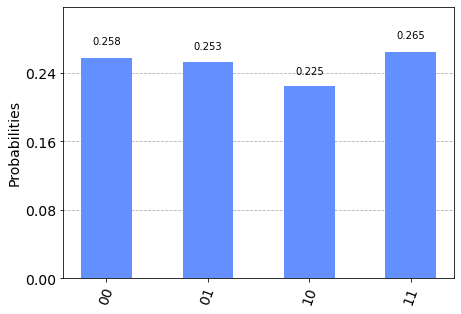

In [7]:
grover_circuit.measure_all()

qasm_simulator = Aer.get_backend('qasm_simulator')
shots = 1024
results = execute(grover_circuit, backend=qasm_simulator, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)